# Probability Distributions - Skewness and Kurtosis Plots

In [167]:
# import required libraries
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

# Uniform Distribution

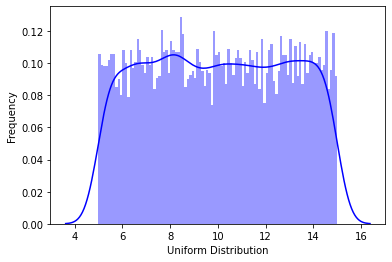

In [169]:
from scipy.stats import uniform

#taking random variables from uniform distribution
data = uniform.rvs(size = 10000, loc = 5, scale = 10)

#print(data.size)
#print(data)
      
#plotting the uniform data
ax = sns.distplot(data,
                  bins = 100,
                  color = 'blue',
                )
ax.set(xlabel = 'Uniform Distribution', ylabel = 'Frequency')

plt.show()


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Normal Distribution

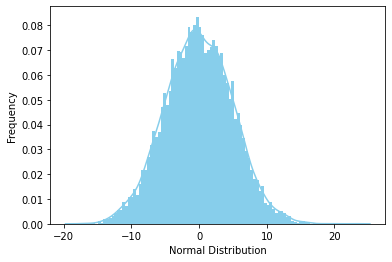

In [170]:
from scipy.stats import norm

data = norm.rvs(size=10000, loc=0, scale=5)

#plotting the  data
ax = sns.distplot(data,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()


# Alternatively

In [143]:
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# No of Data points
N = 500

# initializing random values
data = np.random.randn(N)

# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)


In [160]:
np.min(data)

-3.252314591029305

In [161]:
np.max(data)

3.4210490337984374

In [162]:
print(count)  # count of values fall within the bin

[  3   9  42  88 128 121  57  36  14   2]


In [163]:
print(sum(count))  # total number of samples

500


In [164]:
print(bins_count)  # individual bin boundaries
                   # starts with np.min(data)
                   # ends with np.max(data)

[-3.25231459 -2.58497823 -1.91764187 -1.2503055  -0.58296914  0.08436722
  0.75170358  1.41903995  2.08637631  2.75371267  3.42104903]


In [165]:
print(len(bins_count)) # number of bins + 1

11


# PDF

In [152]:
# finding the PDF of the histogram using count values
pdf = count / sum(count)

In [153]:
pdf

array([0.006, 0.018, 0.084, 0.176, 0.256, 0.242, 0.114, 0.072, 0.028,
       0.004])

# CDF

In [ ]:
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

In [154]:
cdf

array([0.006, 0.024, 0.108, 0.284, 0.54 , 0.782, 0.896, 0.968, 0.996,
       1.   ])

# Plot

Text(0.5, 1.0, 'PDF-CDF')

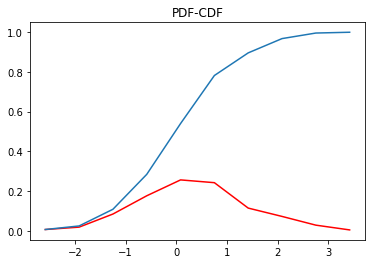

In [171]:
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title('PDF-CDF')

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Exponential Distribution

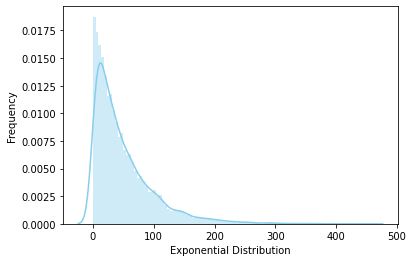

In [178]:
from scipy.stats import expon

data = expon.rvs(loc=0, scale=50, size=10000)

#plotting the  data
ax = sns.distplot(data,
                  bins=100,
                  kde=True,
                  color='skyblue',
                )

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

plt.show()


# Binomial Distribution

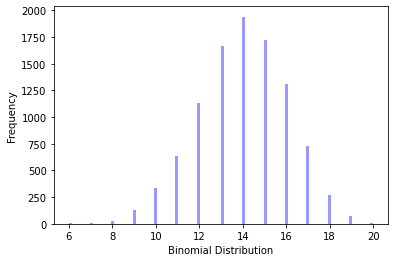

In [136]:
from scipy.stats import binom

data = binom.rvs(n=20, p=0.7, size=10000)

#plotting the  data
ax = sns.distplot(data,
                  bins=100,
                  kde=False,
                  color='blue',
                )

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.show()

# Poisson Distribution

<ipython-input-6-db74f579b7c3>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data,


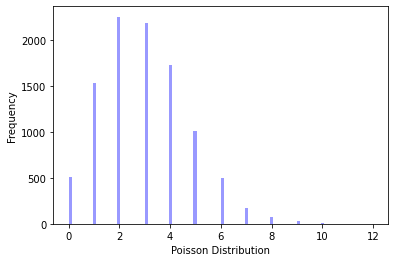

In [6]:
from scipy.stats import poisson

data = poisson.rvs(mu=3, size=10000, random_state = 93)

#plotting the  data
ax = sns.distplot(data,
                  bins=100,
                  kde=False,
                  color='blue',
                )

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

plt.show()

# ++++++++++++++++++++++++++++++++++++++++++++++++++

# Skewed of Distributions

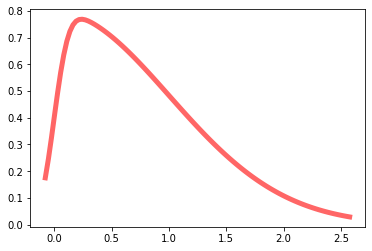

In [190]:
import numpy as np
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# a ia a real number acts as a skewness parameter 
# When a = 0 the distribution is identical to a normal distribution

#a = 10 # positive >> right skew
a = -3 # negative >> left skew
#a = 0 

rv = skewnorm(a)
#mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
#p_data = skewnorm.pdf(x, a)
p_data = rv.pdf(x)

# print('Mean = ', mean)
# print('Variance = ', var)
# print('Skewness = ', skew)
# print('Kurtosis = ', kurt)
# print("\n")

ax.plot(x, p_data,'r-', lw=5, alpha=0.6, label='skewnorm pdf')
plt.show()

# Checking Normality for a Uniform Distribution

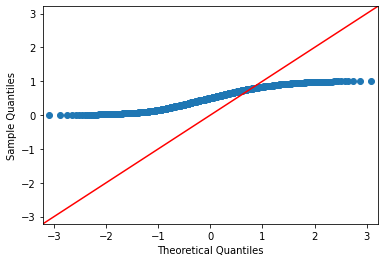

In [191]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create dataset of 100 uniformally distributed values
data = np.random.uniform(0,1, 1000)

#generate Q-Q plot for the dataset
fig = sm.qqplot(data, line='45')
plt.show()


# But if we sample from a Normal distribution, we get the following Q-Q Plot

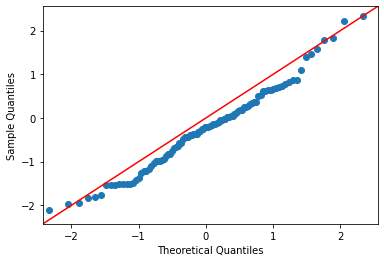

In [92]:
# Random data points generated
data_points = np.random.normal(0, 1, 100)    

sm.qqplot(data_points, line ='45')
plt.show()

# +++++++++++  DONE ++++++++++++++++++++++++

# Kurtosis of Distribution

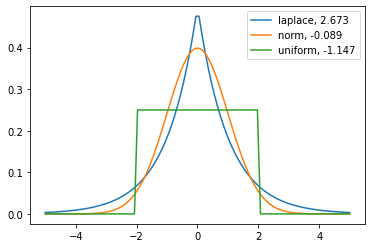

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis
import numpy as np

x = np.linspace(-5, 5, 100)
ax = plt.subplot()

distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)

    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()
    

# Work with Synthetic Data

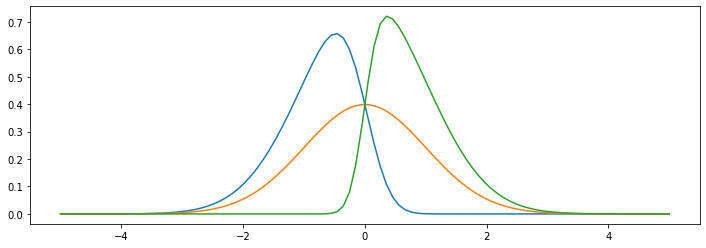

In [4]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

NUM_SAMPLES = 100000
SKEW_PARAMS = [-3, 0, 5]

def skew_norm_pdf(x,e=0,w=1,a=0):
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(a*t)

# generate the skew normal PDF for reference:
location = 0.0
scale = 1.0
x = np.linspace(-5,5,100) 

plt.subplots(figsize=(12,4))
for alpha_skew in SKEW_PARAMS:
    p = skew_norm_pdf(x,location,scale,alpha_skew)
    #alpha is a parameter that controls skew, but the 'skewness'
    plt.plot(x,p)

# Variable Transformation - Exponential to Log

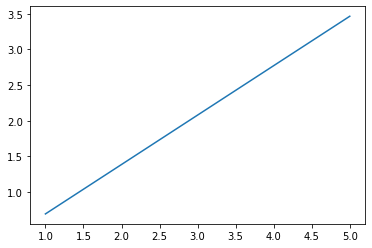

In [117]:
x = np.linspace(1, 5, 5)
#data = np.exp(x)
data = 2**x

#data = np.log(x)
#plt.plot(x,data)
plt.plot(x,np.log(data))

In [115]:
x*np.log(2)

array([0.69314718, 1.38629436, 2.07944154, 2.77258872, 3.4657359 ])

In [116]:
np.log(data)

array([0.69314718, 1.38629436, 2.07944154, 2.77258872, 3.4657359 ])